In [1]:
#Import Required Packages
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from  datetime import date

In [2]:
#Read three dataset given
missing_value_formates=['n.a.','?','NA','n/a','--','null']
df1=pd.read_csv('AdvWorksCusts.csv')
df2=pd.read_csv('AW_AveMonthSpend.csv')
df3=pd.read_csv('AW_BikeBuyer.csv')
#print(df1.shape)
#print(df2.shape)
#print(df3.shape)

In [3]:
#merge all datasets into one dataframe and check result
df = df1.merge(df2, on='CustomerID',how='left')
df=df.merge(df3,on='CustomerID',how='left')
print(df.head(2),df.shape)             

   CustomerID Title FirstName MiddleName LastName Suffix     AddressLine1  \
0       11000   NaN       Jon          V     Yang    NaN  3761 N. 14th St   
1       11001   NaN    Eugene          L    Huang    NaN       2243 W St.   

  AddressLine2         City StateProvinceName  ...    Occupation Gender  \
0          NaN  Rockhampton        Queensland  ...  Professional      M   
1          NaN      Seaford          Victoria  ...  Professional      M   

  MaritalStatus HomeOwnerFlag NumberCarsOwned NumberChildrenAtHome  \
0             M             1               0                    0   
1             S             0               1                    3   

  TotalChildren YearlyIncome  AveMonthSpend  BikeBuyer  
0             2       137947             89          0  
1             3       101141            117          1  

[2 rows x 25 columns] (17209, 25)


In [4]:
#check for the duplicates and remove them 
df.drop_duplicates(subset='CustomerID',keep='last',inplace=True)
print(df.columns,df.shape)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object') (16404, 25)


In [5]:
df.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

In [6]:
#perform data exploration
df['AveMonthSpend'].describe()

count    16404.000000
mean        72.391002
std         27.269921
min         22.000000
25%         52.000000
50%         68.000000
75%         84.000000
max        176.000000
Name: AveMonthSpend, dtype: float64

In [7]:
df.isnull().sum()

CustomerID                  0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16131
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
BikeBuyer                   0
dtype: int64

In [8]:
df.drop(columns=['Title','MiddleName','Suffix','AddressLine2'],inplace=True)

In [9]:
df.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
dtype: int64

In [10]:
#save clean data to be used later for classification and Regression
df.to_csv('clean_data.csv')


In [11]:
#find the counts for each unique category
counts=df['BikeBuyer'].value_counts()
print(counts)


0    10949
1     5455
Name: BikeBuyer, dtype: int64


D:\Users\NEW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


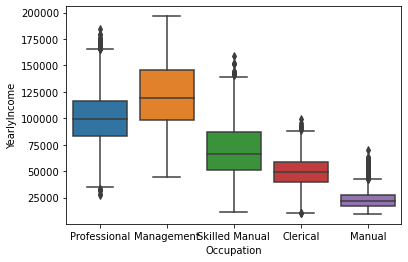

In [12]:
#perform visualization sns box plot for occupation and yearly income to Q7
sns.boxplot('Occupation','YearlyIncome',data=df)
plt.xlabel('Occupation')
plt.ylabel('YearlyIncome')
plt.show()

In [13]:
#convert the Birthdate format and insert the date of data collection 1st jan 1998
DataCollection=pd.to_datetime('1998-01-01')
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
print(DataCollection)
print(df['BirthDate'])

1998-01-01 00:00:00
0       1966-04-08
1       1965-05-14
2       1965-08-12
3       1968-02-15
4       1968-08-08
           ...    
17192   1965-03-22
17196   1936-04-02
17200   1940-01-01
17204   1946-10-20
17208   1945-04-07
Name: BirthDate, Length: 16404, dtype: datetime64[ns]


In [14]:
#convert birthdate in to age at the collection date using function and return age
def convert_bdate_age(cdate,bdate):
    diff=cdate-bdate
    age=diff.dt.days.div(365).astype(int)
    return age

bdate=df['BirthDate']
age=convert_bdate_age(DataCollection,bdate)
df['Age']=age
print(df['Age'])

0        31
1        32
2        32
3        29
4        29
         ..
17192    32
17196    61
17200    58
17204    51
17208    52
Name: Age, Length: 16404, dtype: int32


In [15]:
#classify customer in to agegroup
numGroups = 10
bins=[0,25,45,55,120]
agecats=pd.cut(df['Age'],bins=bins,labels=['0-25','25-45','45-55','55-120'])
#agecats=pd.cut(df['Age'],bins=bins,labels=range(len(bins)-1))
df['AgeGroup']=agecats
print(df['AgeGroup'])

0         25-45
1         25-45
2         25-45
3         25-45
4         25-45
          ...  
17192     25-45
17196    55-120
17200    55-120
17204     45-55
17208     45-55
Name: AgeGroup, Length: 16404, dtype: category
Categories (4, object): ['0-25' < '25-45' < '45-55' < '55-120']


<AxesSubplot:xlabel='AgeGroup', ylabel='AveMonthSpend'>

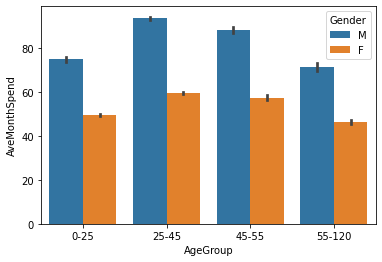

In [16]:
sns.barplot(x='AgeGroup',y='AveMonthSpend',hue='Gender',data=df)

D:\Users\NEW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


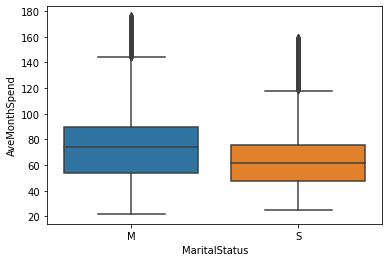

In [17]:
sns.boxplot('MaritalStatus','AveMonthSpend',data=df )
plt.xlabel('MaritalStatus')
plt.ylabel('AveMonthSpend')
plt.show()


D:\Users\NEW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


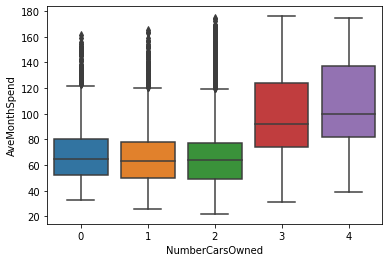

In [18]:
sns.boxplot('NumberCarsOwned','AveMonthSpend',data=df)
plt.xlabel('NumberCarsOwned')
plt.ylabel('AveMonthSpend')
plt.show()


D:\Users\NEW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


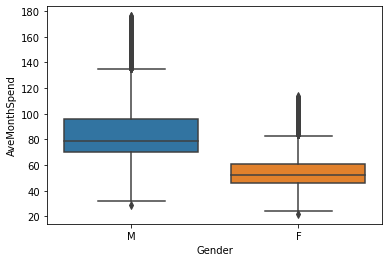

In [19]:
sns.boxplot('Gender','AveMonthSpend',data=df)
plt.xlabel('Gender')
plt.ylabel('AveMonthSpend')
plt.show()
#print(df[['AveMonthSpend','Gender']].groupby(['Gender']).median())
#print(df[['AveMonthSpend','Gender']].groupby(['Gender']).std())



D:\Users\NEW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


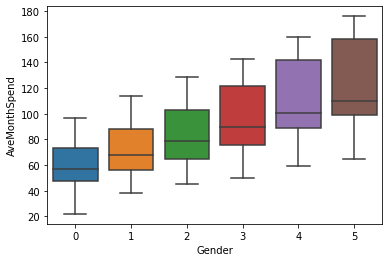

In [20]:
sns.boxplot('NumberChildrenAtHome','AveMonthSpend',data=df)
plt.xlabel('Gender')
plt.ylabel('AveMonthSpend')
plt.show()

D:\Users\NEW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


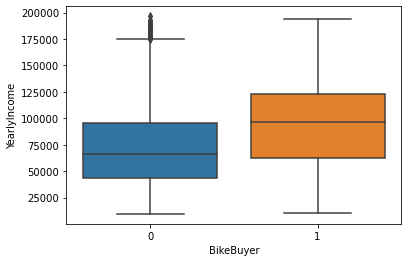

In [21]:
sns.boxplot('BikeBuyer','YearlyIncome',data=df)
plt.xlabel('BikeBuyer')
plt.ylabel('YearlyIncome')
plt.show()
#print(df[['BikeBuyer','YearlyIncome']].groupby(['BikeBuyer']).median())


D:\Users\NEW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


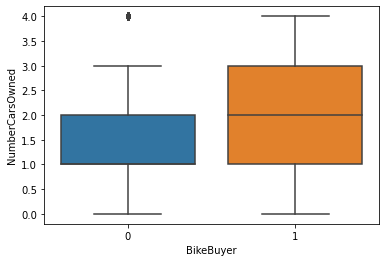

In [22]:
sns.boxplot('BikeBuyer','NumberCarsOwned',data=df)
plt.xlabel('BikeBuyer')
plt.ylabel('NumberCarsOwned')
plt.show()
#print(df[['BikeBuyer','NumberCarsOwned']].groupby(['BikeBuyer']).median())


Occupation
   BikeBuyer      Occupation  dummy
0          0        Clerical   1981
1          0      Management   1702
2          0          Manual   1625
3          0    Professional   2738
4          0  Skilled Manual   2903
5          1        Clerical    616
6          1      Management   1016
7          1          Manual    504
8          1    Professional   2184
9          1  Skilled Manual   1135


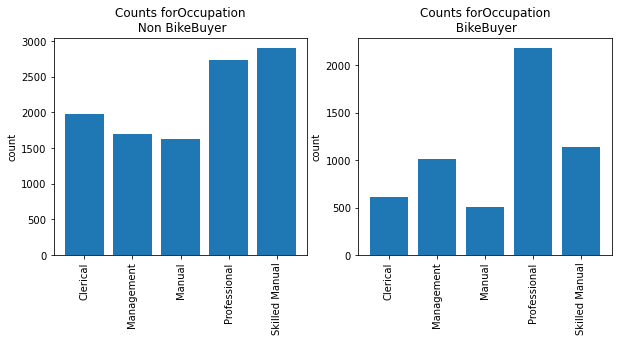

Gender
   BikeBuyer Gender  dummy
0          0      F   5881
1          0      M   5068
2          1      F   2233
3          1      M   3222


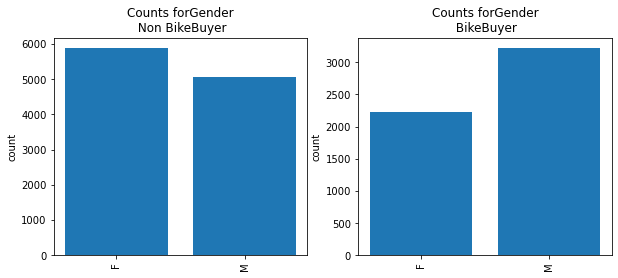

MaritalStatus
   BikeBuyer MaritalStatus  dummy
0          0             M   6653
1          0             S   4296
2          1             M   2199
3          1             S   3256


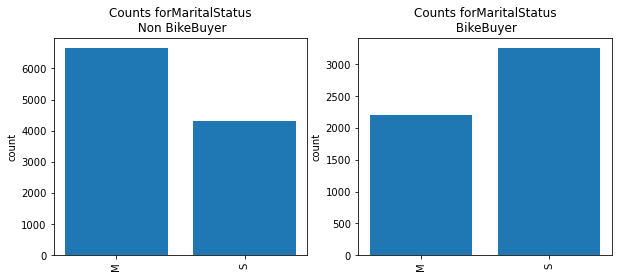

In [23]:
cat_cols=['Occupation','Gender','MaritalStatus']
df['dummy']=np.ones(shape=df.shape[0])
for col in cat_cols:
    print(col)
    counts=df[['dummy','BikeBuyer',col]].groupby(['BikeBuyer',col],as_index=False).count()
    print(counts)
    _=plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    temp=counts[counts['BikeBuyer']==0][[col,'dummy']]
    plt.bar(temp[col],temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for'+col+'\n Non BikeBuyer')
    plt.ylabel('count')
    
    
    plt.subplot(1,2,2)
    temp=counts[counts['BikeBuyer']==1][[col,'dummy']]
    plt.bar(temp[col],temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for'+col+'\n BikeBuyer')
    plt.ylabel('count')
    plt.show()
    

In [24]:

df.to_csv('clean_data_with_Agegroup')